# Media Task


<img src="media.jpg">

Um fortzufahren, werde ich zuerst die Daten in der bereitgestellten Datei überprüfen, um ein besseres Verständnis der vorhandenen Informationen zu bekommen. Anschließend kann ich eine Visualisierung erstellen und einige Top-Erkenntnisse sowie Empfehlungen formulieren. Ich werde nun die Daten laden und analysieren.

Der Datensatz enthält Informationen zu Werbeerinnerung (WE), wobei 1 bedeutet, dass die Werbung erinnert wurde, und verschiedenen Mediakanälen (TV, Online, Mobile, Print, Plakat, Radio). Die Daten umfassen außerdem Informationen zu einer gewichteten Personenzahl (PERS_GEW), Woche der Befragung, Marke (Brand) und dem Alter der befragten Personen.
Die Variablen TV, Online, Mobile, Print, Plakat und Radio repräsentieren wahrscheinlich die Kontakthäufigkeit mit den jeweiligen Medien.

Ich werde eine Visualisierung erstellen, die die Beziehung zwischen den Kontaktfrequenzen und der Werbeerinnerung zeigt. 

Außerdem werde ich die Daten nach Mediakanälen zusammenfassen, um herauszufinden, welche Kanäle am effektivsten für die Werbeerinnerung sind. Basierend auf diesen Informationen kann ich einige Top-Erkenntnisse und Empfehlungen formulieren. 

Zuerst beginne ich damit, die Daten vom RDS-Format in das CSV-Format umzuwandeln und die Daten als Output.csv zu speichern, damit ich wichtige Operationen wie Datenanalyse, Datentransformation und Datenvisualisierung mit Python durchführen kann

In [1]:
import pyreadr

file_path = "./O2_SingleSource.rds"
result = pyreadr.read_r(file_path)
#print(result)
data = result[None]
import pandas as pd
df = pd.DataFrame(data)
csv_file_name= "output.csv"
df.to_csv(csv_file_name, index=False, header=True)
print(f"Die CSV Datei '{csv_file_name}' wurde erfolgreich gespeichert")
print()
print(df.head())

Die CSV Datei 'output.csv' wurde erfolgreich gespeichert

           WE    TV  Online  Mobile  Print  Plakat  Radio  PERS_GEW  \
rownames                                                              
1:11      0.0  20.0     8.0    -1.0    0.0     0.0    1.0     160.0   
1:13      0.0  10.0     2.0    -1.0    0.0     0.0    3.0      45.0   
1:14      1.0   3.0     6.0    -1.0    0.0     0.0    3.0      75.0   
1:15      0.0   1.0     0.0    -1.0    0.0     0.0    4.0      15.0   
1:16      1.0  17.0     0.0    -1.0    0.0     0.0    3.0      82.0   

              woche       Brand  alter  
rownames                                
1:11      KW 3/2016  PC_TKM_O2_   36.0  
1:13      KW 3/2016  PC_TKM_O2_   48.0  
1:14      KW 3/2016  PC_TKM_O2_   66.0  
1:15      KW 3/2016  PC_TKM_O2_   58.0  
1:16      KW 3/2016  PC_TKM_O2_   30.0  


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignoriere alle Warnungen
warnings.filterwarnings("ignore")

# Lade den Datensatz, um dessen Inhalt zu überprüfen
data_path = "./output.csv"
data = pd.read_csv(data_path)

Um ein besseres Gefühl für die Daten zu erhalten, werde ich eine explorative Datenanalyse (EDA) durchführen. Dabei werde ich überprüfen, ob alle Daten vorhanden sind, ob Duplikate oder Nicht-Verfügbare vorliegen und zusätzlich sicherstellen, dass sie im richtigen Format vorliegen.

In [3]:
data.head()

,WE,TV,Online,Mobile,Print,Plakat,Radio,PERS_GEW,woche,Brand,alter
0,0.0,20.0,8.0,-1.0,0.0,0.0,1.0,160.0,KW 3/2016,PC_TKM_O2_,36.0
1,0.0,10.0,2.0,-1.0,0.0,0.0,3.0,45.0,KW 3/2016,PC_TKM_O2_,48.0
2,1.0,3.0,6.0,-1.0,0.0,0.0,3.0,75.0,KW 3/2016,PC_TKM_O2_,66.0
3,0.0,1.0,0.0,-1.0,0.0,0.0,4.0,15.0,KW 3/2016,PC_TKM_O2_,58.0
4,1.0,17.0,0.0,-1.0,0.0,0.0,3.0,82.0,KW 3/2016,PC_TKM_O2_,30.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51507 entries, 0 to 51506
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   WE        51507 non-null  float64
 1   TV        51507 non-null  float64
 2   Online    51507 non-null  float64
 3   Mobile    51507 non-null  float64
 4   Print     51507 non-null  float64
 5   Plakat    51507 non-null  float64
 6   Radio     51507 non-null  float64
 7   PERS_GEW  51507 non-null  float64
 8   woche     51507 non-null  object 
 9   Brand     51507 non-null  object 
 10  alter     51507 non-null  float64
dtypes: float64(9), object(2)
memory usage: 4.3+ MB


In [5]:
data.describe()

,WE,TV,Online,Mobile,Print,Plakat,Radio,PERS_GEW,alter
count,51507.000000,51507.000000,51507.000000,51507.000000,51507.000000,51507.000000,51507.000000,51507.000000,51507.000000
mean,0.255325,26.200070,12.849613,6.350360,1.915623,3.720252,11.858660,100.230396,31.593259
std,0.436048,46.533619,32.007391,18.201821,1.457825,13.639074,27.042572,93.719234,16.526498
min,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,9.000000,2.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,43.000000,18.000000
50%,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,74.000000,31.000000
75%,1.000000,26.000000,4.000000,1.000000,2.000000,1.000000,3.000000,121.000000,44.000000
max,1.000000,501.000000,1694.000000,100.000000,13.000000,122.000000,327.000000,850.000000,87.000000


Der geladene Datensatz enthält mehrere Variablen:

- WE: Werbeerinnerung (0 = nein, 1 = ja).
- TV: Kontaktfrequenz über den TV-Kanal.
- Online: Kontaktfrequenz über den Online-Kanal.
- Mobile: Kontaktfrequenz über den mobilen Kanal.
- Print: Kontaktfrequenz über den Print-Kanal.
- Plakat: Kontaktfrequenz über den Plakat-Kanal.
- Radio: Kontaktfrequenz über den Radiokanal.
- PERS_GEW: Eine Gewichtungsvariable.
- woche: Die Kalenderwoche der Datenerfassung.
- Brand: Die Marke, möglicherweise als Kategorie.
- alter: Das Alter der befragten Person.


In [6]:
nan_exist = data.isnull().values.any()
print("Existieren NaN-Werte im Datensatz?", nan_exist)

Existieren NaN-Werte im Datensatz? False


In [7]:
# Überprüfen auf Duplikate
duplicates_exist = data.duplicated().any()
print("Existieren Duplikate im Datensatz?", duplicates_exist)

Existieren Duplikate im Datensatz? True


In [8]:
# Überprüfen der Anzahl der Zeilen vor der Bereinigung
print("Anzahl der Zeilen vor der Bereinigung von Duplikaten:", len(data))

Anzahl der Zeilen vor der Bereinigung von Duplikaten: 51507


In [9]:
# Bereinigung von Duplikaten im Datensatz
data_bereinigt = data.drop_duplicates()

# Überprüfen der Anzahl der Zeilen nach der Bereinigung
print("Anzahl der Zeilen nach der Bereinigung von Duplikaten:", len(data_bereinigt))

Anzahl der Zeilen nach der Bereinigung von Duplikaten: 50301


Als nächster Schritt, nachdem ich die Daten überprüft und die Duplikate entfernt habe, werde ich mit den Korrelationen beginnen.

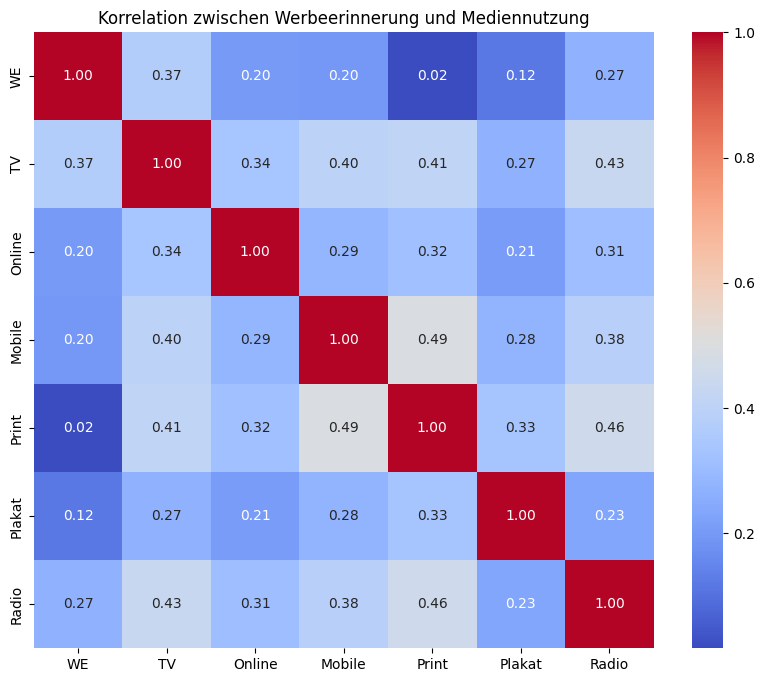

In [10]:
# Auswahl der relevanten Spalten für die Korrelationsanalyse
""" Auswahl der Spalten: Es werden nur die Spalten ausgewählt, die für die Werbeerinnerung (WE) 
und die verschiedenen Medienkanäle relevant sind.""" 
relevant_columns = ['WE', 'TV', 'Online', 'Mobile', 'Print', 'Plakat', 'Radio']

# Berechnung der Korrelationsmatrix
""" Korrelationsmatrix berechnen: Mit der Funktion corr() von pandas wird die 
Korrelationsmatrix zwischen diesen Spalten berechnet. """ 
corr_matrix = data_bereinigt[relevant_columns].corr()

# Erstellen einer Heatmap zur Darstellung der Korrelationsmatrix
""" Visualisierung: Die Korrelationsmatrix wird mit einer Heatmap visualisiert, 
wobei seaborn und matplotlib für eine klare Darstellung sorgen.""" 
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Korrelation zwischen Werbeerinnerung und Mediennutzung')
plt.show()


Die obige Korrelationsmatrix zeigt die Beziehungen zwischen der Werbeerinnerung (WE) und den Kontaktfrequenzen der verschiedenen Mediakanäle. Eine positive Zahl zeigt eine positive Beziehung an, d.h., höhere Kontaktfrequenzen korrelieren mit einer höheren Wahrscheinlichkeit, dass die Werbung erinnert wird.
Hier sind einige Schlüsselerkenntnisse aus der Korrelationsanalyse:
- TV (0.37) und Radio (0.27) zeigen moderate positive Korrelationen mit der Werbeerinnerung, was darauf hindeutet, dass diese Kanäle effektiv in der Steigerung der Werbeerinnerung sein könnten.
- Online- (0.20) und Mobile-Kanäle (0.20) haben ebenfalls positive, aber geringere Korrelationen. Das könnte bedeuten, dass sie zwar zur Werbeerinnerung beitragen, aber möglicherweise nicht so stark wie TV und Radio.
- Print (0.02) und Plakat (0.12) haben die niedrigsten positiven Korrelationen mit der Werbeerinnerung, was darauf hinweist, dass diese Medien möglicherweise weniger Einfluss auf die Erinnerung der Konsumenten haben.

Basierend auf diesen Erkenntnissen könnte eine Empfehlung für XXX sein, die Investitionen in TV- und Radiowerbung zu erhöhen, insbesondere in demografischen Gruppen und Zeiträumen, in denen hohe Erinnerungswerte gezeigt werden. Online- und Mobile-Werbung sollten weiterhin genutzt werden, um die Reichweite zu maximieren, allerdings mit einem gezielten Ansatz, der die Effektivität dieser Kanäle steigert.

Die Auswahl spezifischer Daten für eine Korrelationsanalyse hängt von den Zielen der Analyse und der Verfügbarkeit relevanter Variablen ab. In diesem Fall habe ich mich auf die Werbeerinnerung (WE) und die Kontaktfrequenzen der verschiedenen Mediakanäle konzentriert, da das Hauptziel war, zu verstehen, wie diese Medienkontakte die Erinnerung an die Werbung beeinflussen.

## Warum diese Daten?

1.	Werbeerinnerung (WE): Dies ist die Zielvariable, da wir untersuchen möchten, welche Faktoren dazu beitragen, dass sich Personen an eine Werbung erinnern.

2.	Medienkanäle (TV, Online, Mobile, Print, Plakat, Radio): Diese Variablen sind die Hauptprädiktoren. Es ist logisch anzunehmen, dass häufigere Kontakte mit Werbung über verschiedene Kanäle hinweg die Erinnerung an die Werbung verbessern könnten.



### Andere Parameter für Korrelationsanalysen

Abgesehen von den Medienkontakten können auch andere Variablen interessant sein, um Korrelationen oder grafische Darstellungen zu untersuchen:

1.	Demografische Daten:

- Alter: Untersuchung der Korrelation zwischen Alter und Werbeerinnerung könnte aufzeigen, ob bestimmte Altersgruppen empfänglicher für bestimmte Werbeformen sind.


2. Zeitbezogene Daten:

- Woche der Datenerhebung: Die Betrachtung der Werbeerinnerung im Zeitverlauf könnte saisonale Trends oder die Auswirkungen spezieller Werbekampagnen aufzeigen.


3.	Gewichtete Personenzahl (PERS_GEW):

- Diese Variable könnte dazu dienen, die Stichprobengröße oder die Bedeutung der Beobachtungen zu verstehen und ihre Korrelation mit der Werbeerinnerung zu analysieren.

# Grafische Darstellungen für weitere Analysen

## Zeitreihenanalyse: 

Visualisierung der Werbeerinnerung über die Zeit hinweg, um Trends oder Muster zu erkennen.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Umwandlung der 'woche' Spalte in datetime, um es als Zeitreihe zu behandeln
data_bereinigt['woche'] = data_bereinigt['woche'].str.replace('KW ', '')
data_bereinigt['woche'] = pd.to_datetime(data_bereinigt['woche'] + '/1', format='%W/%Y/%w')

"""
Diese Zeile konvertiert die bereinigten Einträge in der Spalte 'woche' in Datumsobjekte. Der Ausdruck 
data_bereinigt['woche'] + '/1' fügt '/1' am Ende jedes Eintrags hinzu, was das Datum auf den ersten Tag des 
entsprechenden Monats setzt. Die Funktion pd.to_datetime() konvertiert dann diese modifizierten Einträge in 
Datumsobjekte. Das format='%W/%Y/%w' gibt das Eingabeformat an, in dem die Daten vorliegen. 
Hier steht '%W' für die Kalenderwoche, '%Y' für das Jahr und '%w' für den Wochentag.
"""


"\nDiese Zeile konvertiert die bereinigten Einträge in der Spalte 'woche' in Datumsobjekte. Der Ausdruck \ndata_bereinigt['woche'] + '/1' fügt '/1' am Ende jedes Eintrags hinzu, was das Datum auf den ersten Tag des \nentsprechenden Monats setzt. Die Funktion pd.to_datetime() konvertiert dann diese modifizierten Einträge in \nDatumsobjekte. Das format='%W/%Y/%w' gibt das Eingabeformat an, in dem die Daten vorliegen. \nHier steht '%W' für die Kalenderwoche, '%Y' für das Jahr und '%w' für den Wochentag.\n"

In [12]:
data_bereinigt.head()

,WE,TV,Online,Mobile,Print,Plakat,Radio,PERS_GEW,woche,Brand,alter
0,0.0,20.0,8.0,-1.0,0.0,0.0,1.0,160.0,2016-01-18,PC_TKM_O2_,36.0
1,0.0,10.0,2.0,-1.0,0.0,0.0,3.0,45.0,2016-01-18,PC_TKM_O2_,48.0
2,1.0,3.0,6.0,-1.0,0.0,0.0,3.0,75.0,2016-01-18,PC_TKM_O2_,66.0
3,0.0,1.0,0.0,-1.0,0.0,0.0,4.0,15.0,2016-01-18,PC_TKM_O2_,58.0
4,1.0,17.0,0.0,-1.0,0.0,0.0,3.0,82.0,2016-01-18,PC_TKM_O2_,30.0


In [13]:
data_bereinigt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50301 entries, 0 to 51506
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   WE        50301 non-null  float64       
 1   TV        50301 non-null  float64       
 2   Online    50301 non-null  float64       
 3   Mobile    50301 non-null  float64       
 4   Print     50301 non-null  float64       
 5   Plakat    50301 non-null  float64       
 6   Radio     50301 non-null  float64       
 7   PERS_GEW  50301 non-null  float64       
 8   woche     50301 non-null  datetime64[ns]
 9   Brand     50301 non-null  object        
 10  alter     50301 non-null  float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 4.6+ MB


In [14]:
# Berechnung des wöchentlichen Durchschnitts der Werbeerinnerung (WE)
weekly_avg = data_bereinigt.groupby(pd.Grouper(key='woche', freq='W'))['WE'].mean()


"""
Diese Operation führt eine Berechnung des wöchentlichen Durchschnitts der Werbeerinnerung (WE) durch. Hier ist eine Erklärung Schritt für Schritt:

1.	Groupby-Methode: Die groupby()-Methode wird verwendet, um die Daten nach einem bestimmten Kriterium zu gruppieren, in diesem Fall nach der 'woche'.
2.	pd.Grouper(): Diese Funktion erzeugt einen Grouper für die Gruppierung nach einem bestimmten Schlüssel ('woche' in diesem Fall) und mit einer bestimmten 
Frequenz ('W' für wöchentlich).
3.	'woche': Dies ist der Schlüssel, nach dem die Daten gruppiert werden sollen.
4.	freq='W': Dies gibt an, dass die Daten wöchentlich gruppiert werden sollen.
5.	['WE'].mean(): Nachdem die Daten gruppiert wurden, wird der Durchschnitt ('mean()') der Werte in der Spalte 'WE' für jede Woche berechnet.

Das Ergebnis dieser Operation ist eine Serie (Pandas Series) mit dem wöchentlichen Durchschnitt der Werbeerinnerung (WE) über den Zeitverlauf. 
Jeder Eintrag in der Serie entspricht dem Durchschnitt der WE für eine bestimmte Woche.

"""

"\nDiese Operation führt eine Berechnung des wöchentlichen Durchschnitts der Werbeerinnerung (WE) durch. Hier ist eine Erklärung Schritt für Schritt:\n\n1.\tGroupby-Methode: Die groupby()-Methode wird verwendet, um die Daten nach einem bestimmten Kriterium zu gruppieren, in diesem Fall nach der 'woche'.\n2.\tpd.Grouper(): Diese Funktion erzeugt einen Grouper für die Gruppierung nach einem bestimmten Schlüssel ('woche' in diesem Fall) und mit einer bestimmten \nFrequenz ('W' für wöchentlich).\n3.\t'woche': Dies ist der Schlüssel, nach dem die Daten gruppiert werden sollen.\n4.\tfreq='W': Dies gibt an, dass die Daten wöchentlich gruppiert werden sollen.\n5.\t['WE'].mean(): Nachdem die Daten gruppiert wurden, wird der Durchschnitt ('mean()') der Werte in der Spalte 'WE' für jede Woche berechnet.\n\nDas Ergebnis dieser Operation ist eine Serie (Pandas Series) mit dem wöchentlichen Durchschnitt der Werbeerinnerung (WE) über den Zeitverlauf. \nJeder Eintrag in der Serie entspricht dem Durchs

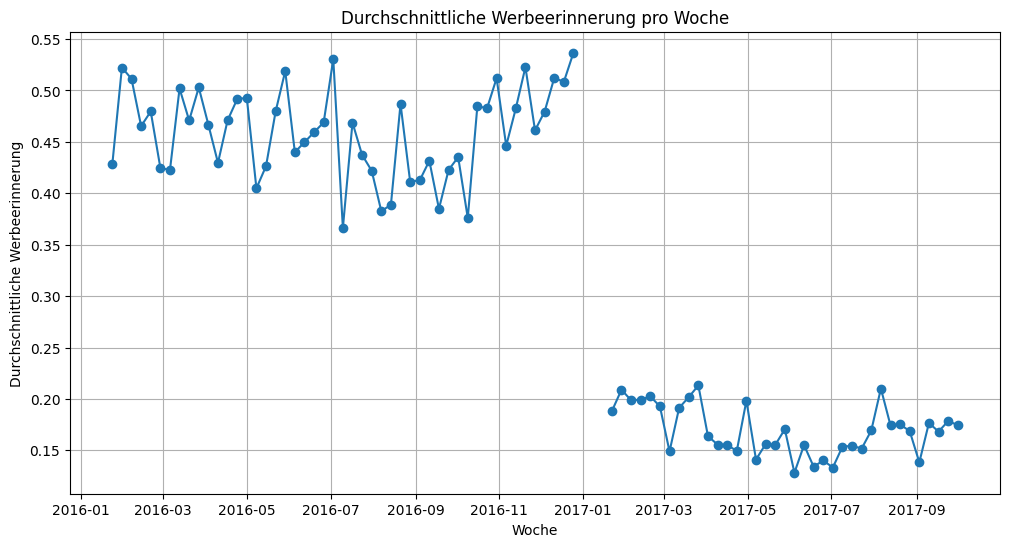

In [15]:
# Erstellung des Zeitreihendiagramms
plt.figure(figsize=(12, 6))
plt.plot(weekly_avg, marker='o', linestyle='-')
plt.title('Durchschnittliche Werbeerinnerung pro Woche')
plt.xlabel('Woche')
plt.ylabel('Durchschnittliche Werbeerinnerung')
plt.grid(True)
plt.show()

Das Bild zeigt ein Zeitreihendiagramm, das die durchschnittliche Werbeerinnerung pro Woche über einen Zeitraum von Anfang 2016 bis Ende 2017 darstellt. 

Auf der horizontalen Achse (X-Achse) ist die Zeit in Wochen formatiert als Jahr-Monat dargestellt. Auf der vertikalen Achse (Y-Achse) wird die durchschnittliche Werbeerinnerung als numerischer Wert angegeben.

Das Diagramm könnte für eine Analyse verwendet werden, um:

- Saisonale Trends zu erkennen: Gibt es bestimmte Zeiten im Jahr, in denen die Werbeerinnerung tendenziell höher oder niedriger ist? Beispielsweise könnte ein Anstieg um Feiertage herum auf saisonale Werbekampagnen hinweisen.

Die Wirkung von Werbekampagnen zu messen: Ein plötzlicher Anstieg oder Abfall in der Werbeerinnerung könnte darauf hinweisen, dass eine bestimmte Werbekampagne gestartet oder beendet wurde und wie effektiv sie in Bezug auf die Erinnerung war.

- Langfristige Trends zu identifizieren: Verändert sich die durchschnittliche Werbeerinnerung über die Monate und Jahre hinweg?

- Zu analysieren, wie externe Ereignisse die Werbeerinnerung beeinflussen: Ereignisse wie große Sportveranstaltungen oder Veränderungen in der Medienlandschaft können sich auf die Werbeerinnerung auswirken.

Im Detail sieht es so aus, als ob die durchschnittliche Werbeerinnerung in der ersten Hälfte des betrachteten Zeitraums größere Schwankungen aufweist und zu einem späteren Zeitpunkt abnimmt, was auf unterschiedliche Faktoren hinweisen könnte. 

## Boxplots und Violin-Plots
Diese Plots sind nützlich, um die Verteilung der Werbeerinnerung über verschiedene Mediakanäle zu vergleichen.

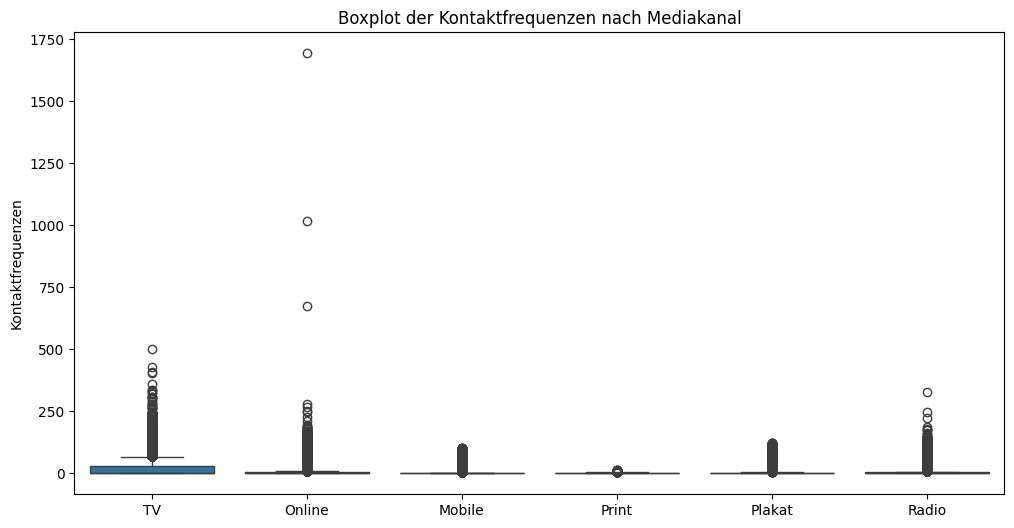

In [16]:
# Erstellung eines Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_bereinigt[['TV', 'Online', 'Mobile', 'Print', 'Plakat', 'Radio']])
plt.title('Boxplot der Kontaktfrequenzen nach Mediakanal')
plt.ylabel('Kontaktfrequenzen')
plt.show()


Das Bild zeigt einen Boxplot, der die Verteilung der Kontaktfrequenzen nach verschiedenen Mediakanälen darstellt: TV, Online, Mobile, Print, Plakat (Poster), und Radio. Ein Boxplot ist eine grafische Darstellung der Verteilung von Datenpunkten basierend auf einer fünf-Punkte-Zusammenfassung: Minimum, erstes Quartil (Q1), Median (zweites Quartil, Q2), drittes Quartil (Q3) und Maximum.

Hier sind einige Schlüsselmerkmale eines Boxplots, die auf das Bild zutreffen:


Die Box: Der zentrale Kasten repräsentiert die interquartile Range (IQR), die Distanz zwischen dem ersten und dritten Quartil. Dies zeigt die mittleren 50% der Daten.
Der Median: Die Linie in der Mitte der Box zeigt den Median der Daten an. Das ist der Wert, der genau in der Mitte der Datensätze liegt, wenn diese der Größe nach geordnet werden.
Die Whisker: Das sind die Linien, die sich von der Box nach oben und unten erstrecken. Sie repräsentieren den Bereich innerhalb des 1,5-fachen der IQR über dem dritten Quartil und unter dem ersten Quartil. Punkte außerhalb dieses Bereichs werden oft als Ausreißer betrachtet.
Ausreißer: Das sind Datenpunkte, die außerhalb der Whiskers liegen. Sie werden als einzelne Punkte dargestellt.

Basierend auf dem Bild können wir folgendes interpretieren, dass der Mediakanal "Online" die meisten Ausreißer aufweist. Das bedeutet, dass es einige Fälle gibt, in denen die Kontaktfrequenz mit Online-Werbung weit über dem liegt, was als typisch für diesen Kanal betrachtet wird (dargestellt durch die Whiskers des Boxplots).

Die Präsenz von Ausreißern in diesem Kontext könnte verschiedene Dinge bedeuten:

Unterschiedliche Engagement-Level: Einige Online-Plattformen oder Kampagnen könnten viel höhere Engagement- oder Kontaktraten haben als andere, was zu einer ungleichen Verteilung führen würde.

Viralität: Online-Inhalte können viral gehen, was zu einem plötzlichen und sehr großen Anstieg der Kontaktfrequenzen führen kann, die dann als Ausreißer erscheinen.

Daten- oder Messfehler: Manchmal können Ausreißer auch auf Fehler in den Daten oder in der Art und Weise zurückzuführen sein, wie die Kontakte gemessen wurden.

Experimentelle oder gezielte Kampagnen: Es könnte spezielle Online-Werbekampagnen geben, die entworfen wurden, um eine hohe Kontaktfrequenz zu erreichen, oder solche, die auf eine sehr engagierte Zielgruppe abzielen.

Das Vorhandensein von Ausreißern ist an sich nicht unbedingt negativ oder positiv; es zeigt einfach an, dass es Fälle gibt, die sich deutlich vom Durchschnitt unterscheiden. Für Werbetreibende ist es wichtig, diese Ausreißer zu untersuchen, um zu verstehen, was sie verursacht und ob sie replizierbar oder wünschenswert für zukünftige Kampagnen sind.

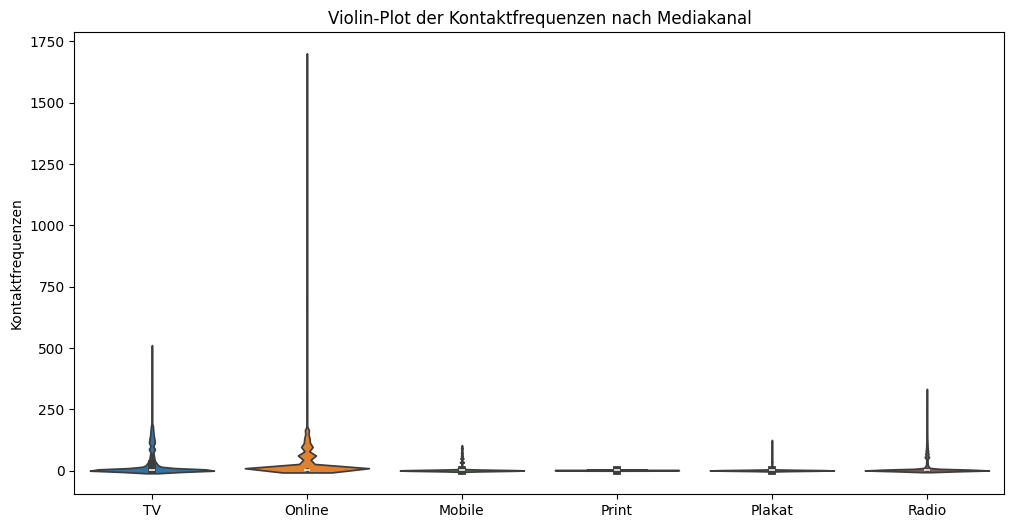

In [17]:
# Erstellung eines Violin-Plots
plt.figure(figsize=(12, 6))
sns.violinplot(data=data_bereinigt[['TV', 'Online', 'Mobile', 'Print', 'Plakat', 'Radio']])
plt.title('Violin-Plot der Kontaktfrequenzen nach Mediakanal')
plt.ylabel('Kontaktfrequenzen')
plt.show()

Ein Violin-Plot kombiniert Elemente eines Boxplots mit einer Kernel-Dichteschätzung. Dieses Bild zeigt also Violin-Plots für die Kontaktfrequenzen nach verschiedenen Mediakanälen. Hier ist, was die verschiedenen Teile des Violin-Plots darstellen:

Breiter Bereich: Wo der "Violin" breit ist, gibt es eine hohe Dichte an Datenpunkten, was bedeutet, dass viele Beobachtungen in diesem Bereich liegen.
Enger Bereich oder Taille: Ein schmaler Bereich zeigt an, dass weniger Beobachtungen vorhanden sind.
Außenseite der "Violins": Die äußeren Linien zeigen die gesamte Bandbreite der Daten, einschließlich potenzieller Ausreißer.
Interpretation der Ergebnisse für TV, Online und Radio:

TV: Der Violin-Plot für TV ist sehr schlank und konzentriert sich auf eine niedrige Kontaktfrequenz, was darauf hindeutet, dass die meisten Kontaktfrequenzen für TV relativ homogen sind und es nur wenige Ausreißer gibt.

Online: Der Online-Mediakanal zeigt eine breite Basis und Spitze im Violin-Plot, was auf eine große Variation in den Kontaktfrequenzen hinweist. Die breitere Verteilung zeigt, dass es sowohl viele niedrige als auch hohe Kontaktfrequenzen gibt, und die Spitzen an den Enden deuten auf Ausreißer hin.

Radio: Der Violin-Plot für Radio zeigt eine schmale Form mit einer Spitze, die auf eine niedrige Kontaktfrequenz hindeutet, aber mit einigen Ausreißern bei höheren Frequenzen.
Vergleicht man diese drei Mediakanäle, könnte man schlussfolgern, dass:

Die Kontaktfrequenz bei TV recht konstant und gering variierend ist.
Online zeigt die größte Vielfalt und Streuung in den Kontaktfrequenzen, was möglicherweise auf eine heterogene Natur von Online-Kampagnen und Verhaltensweisen hindeutet.
Radio hat eine ähnliche Kontaktfrequenz wie TV, aber mit einigen hohen Kontaktfrequenzen, die sich als Ausreißer manifestieren.

Diese Informationen können für Marketinganalysen nützlich sein, um zu verstehen, wie breit das Publikum über verschiedene Medienkanäle hinweg erreicht wird und wie konsistent die Kontaktraten in diesen Kanälen sind.

## Logistische Regression 

Zudem möchte ich noch die logistische Regression (ML) in diesem Fall verwenden, weil die abhängige Variable, die Werbeerinnerung (WE), eine binäre Variable ist (mit den Werten 0 oder 1). Logistische Regression ist speziell für die Vorhersage der Wahrscheinlichkeit von binären Ergebnissen konzipiert und ist eine einfache sowie interpretierbare Methode für solche Arten von Klassifizierungsproblemen.

Für eine logistische Regression werde ich die Werbeerinnerung (WE) als Zielvariable verwenden und die anderen Variablen als Prädiktoren betrachten, außer PERS_GEW, woche und Brand, die in diesem Fall möglicherweise nicht relevant sind oder eine spezielle Behandlung benötigen. Da Mobile negative Werte enthält, die möglicherweise für 'keine Daten' stehen, muss ich entscheiden, wie ich damit umgehe. Ich könnte sie entweder entfernen oder als 0 interpretieren, falls dies 'keine Kontakte' bedeutet.

Ich werde mit der logistischen Regression fortfahren, indem ich zunächst die negativen Werte in Mobile behandele. Anschließend werde ich die Regression mit den verbleibenden Mediakanälen als Prädiktoren durchführen.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Behandlung negativer Werte in 'Mobile' (wir ersetzen diese mit 0)
data_bereinigt['Mobile'] = data_bereinigt['Mobile'].apply(lambda x: 0 if x < 0 else x)

# Entfernung der nicht benötigten Spalten
X = data_bereinigt[['TV', 'Online', 'Mobile', 'Print', 'Plakat', 'Radio', 'alter']]
y = data_bereinigt['WE']

# Standardisierung der Prädiktorvariablen
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aufteilung der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Erstellung und Training des logistischen Regressionsmodells
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluation des Modells auf dem Testset
predictions = model.predict(X_test)
report = classification_report(y_test, predictions)

# Ausgabe des Evaluationsberichts
print(report)

# Ausgabe der Koeffizienten des Modells
coefficients = pd.DataFrame(model.coef_[0], index=X.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False)


              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85     11191
         1.0       0.58      0.30      0.40      3900

    accuracy                           0.76     15091
   macro avg       0.69      0.61      0.63     15091
weighted avg       0.74      0.76      0.74     15091



,Coefficient
TV,0.766131
Radio,0.438046
Mobile,0.260532
Online,0.226836
alter,0.103045
Plakat,0.094477
Print,-0.740397


Die logistische Regression wurde erfolgreich durchgeführt. Hier ist die Bewertung des Modells:

Genauigkeit: Das Modell erreicht eine Gesamtgenauigkeit von 76%, was bedeutet, dass in etwa 76% der Fälle die Vorhersage der Werbeerinnerung korrekt war.

Präzision für Klasse 1 (WE=ja): Die Präzision für die Vorhersage von Werbeerinnerung (ja) ist 58%, was bedeutet, dass von den als 'erinnert' vorhergesagten Fällen tatsächlich 58% korrekt waren.

Recall für Klasse 1 (WE=ja): Der Recall für die Vorhersage von Werbeerinnerung (ja) ist 30%, was bedeutet, dass das Modell 30% der tatsächlichen Fälle von Werbeerinnerung identifizieren konnte.


### Und hier ist, wie die verschiedenen Faktoren laut den Koeffizienten der logistischen Regression die Wahrscheinlichkeit beeinflussen, dass sich jemand an eine Werbung erinnert:

- TV: Der stärkste positive Einfluss auf die Werbeerinnerung, ein höherer Wert in diesem Kanal erhöht die Wahrscheinlichkeit einer Erinnerung.

- Radio: Ebenfalls ein positiver Einfluss, aber weniger stark als TV.

- Mobile: Ein moderater positiver Einfluss auf die Werbeerinnerung.

- Online: Ein geringer positiver Einfluss.

- Alter: Ein kleiner positiver Effekt, ältere Personen erinnern sich möglicherweise etwas besser an Werbungen.

- Plakat: Ein sehr geringer positiver Einfluss.

- Print: Ein negativer Einfluss, ein höherer Wert in diesem Kanal ist mit einer geringeren Wahrscheinlichkeit verbunden, sich an Werbung zu erinnern.



Es ist wichtig zu beachten, dass diese Ergebnisse auf den vorliegenden Daten basieren und die Interpretationen nur innerhalb des Kontexts dieser spezifischen Datenmenge gültig sind. 

Außerdem könnte die Modellleistung durch das Hinzufügen weiterer relevanter Features, die Durchführung einer Feature-Selektion oder das Anwenden von anderen Modellierungsansätzen verbessert werden. ​​

Es gibt jedoch noch viele andere maschinelle Lernmodelle, die man für Klassifizierungsprobleme wie dieses verwenden könnte, insbesondere wenn die Beziehung zwischen den Variablen nicht linear ist oder wenn es komplexere Interaktionen zwischen den Merkmalen gibt. 

Hier sind einige Beispiele:

- Entscheidungsbäume: Diese Modelle sind gut zu interpretieren und können nichtlineare Beziehungen zwischen Merkmalen und dem Ziel darstellen.

- Random Forest: Ein Ensemble-Modell, das auf vielen Entscheidungsbäumen basiert und in der Regel zu besseren Vorhersagen als ein einzelner Entscheidungsbau führt. Es ist robuster gegenüber Overfitting und kann die Wichtigkeit der Merkmale bewerten.

- Gradient Boosting Machines (GBM): Diese sind leistungsfähige Ensemble-Lernmodelle, die schrittweise Entscheidungsbäume aufbauen, um die Vorhersage zu verbessern.

- Support Vector Machines (SVM): Diese sind besonders effektiv in Fällen, wo es eine klare Trennung zwischen den Klassen gibt. SVM kann lineare und nichtlineare Trennungen durchführen.



### Als Ergänzung zu diesem Jupyter Notebook habe ich eine ansprechende PowerPoint-Präsentation erstellt. In dieser Präsentation werden wichtige Top-Ergebnisse zur Werbeerinnerung präsentiert und Empfehlungen für Marketingstrategien gegeben.